# Analytics of Ambient

- 作業環境
    - https://miro.com/app/board/o9J_l9jSAOo=/
    - https://drive.google.com/drive/folders/1wnKK2SaN9DgPUa2PFSJbwizaDHOHitGc?usp=sharing
 

## やりたいこと

 - ある音のラウドネスとシャープネスなどの指標でマッピングする
 
## 課題

 - 音を分割するひつようがある. 
     - N 秒
 - 心理音響指標をpythonで出せるか
     - [MoSQITo/tuto_signal_basic_operations.ipynb at master · Eomys/MoSQITo · GitHub](https://github.com/Eomys/MoSQITo/blob/master/tutorials/tuto_signal_basic_operations.ipynb)

## 進め方

 - 1. 音を聴く.
 - 2. 心理音響指標算出
 
 
 ## 結果
  - 音源が長くて心理音響指標が計算できない
 
 ## 変更
  - 音源を5秒刻みに変更
  - 中間3秒だけで心理音響指標を算出
  - jsonで保存

# Utils

In [1]:
!git clone https://github.com/AllenDowney/ThinkDSP.git 


fatal: destination path 'ThinkDSP' already exists and is not an empty directory.


In [2]:
import sys
sys.path.insert(0, 'ThinkDSP/code/') 
import thinkdsp
import IPython

def play_sound(snd_path):
    wave = thinkdsp.read_wave(f"{snd_path}.wav") # Paste this into the previous examples
    return wave

# mp4を見る

In [3]:
from pathlib import Path
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import japanize_matplotlib
import seaborn

import librosa
import librosa.display

import warnings
warnings.simplefilter('ignore')


In [4]:
DATA_DIR = "data/m4a"
assert Path(DATA_DIR).exists()

WAV_DIR = "data/wav"
assert Path(WAV_DIR).exists()

In [5]:
m4a_paths = [str(p) for p in list(Path(DATA_DIR).glob("*.m4a")) ]
m4a_paths

['data/m4a/12.東大通パーク2.m4a',
 'data/m4a/13.浜松朝.m4a',
 'data/m4a/2.新宿駅JR中央線東京行きプラットホーム.m4a',
 'data/m4a/15.新宿駅湘南新宿ライン1番プラットホーム.m4a',
 'data/m4a/4.大阪梅田.m4a',
 'data/m4a/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.m4a',
 'data/m4a/16.新川崎駅高架.m4a',
 'data/m4a/18.渋谷センター街.m4a',
 'data/m4a/8.近鉄河内長野-藤井寺車内.m4a',
 'data/m4a/7.近鉄あべの橋車内.m4a',
 'data/m4a/14.阿佐ヶ谷シェアハウス前雨.m4a',
 'data/m4a/17.渋谷スクランブル交差点.m4a',
 'data/m4a/11.東大通パーク.m4a',
 'data/m4a/5.うめだ駅構内.m4a',
 'data/m4a/6.地下鉄梅田御堂筋線.m4a',
 'data/m4a/10.古市小学校前.m4a',
 'data/m4a/9.白鳥神社.m4a',
 'data/m4a/3.夜行バス清水.m4a']

### m4aをWavに変換

In [6]:
def convert_wav(snd_path, out_dir, mono=True):
    import subprocess
    
    wav_path = Path(out_dir) / Path(snd_path).name
    
    if mono:
        wav_path = Path(wav_path).with_suffix(".mono.wav")
        subprocess.call(['ffmpeg', '-i', snd_path, '-ac', "1", "-ar", "44100",
                    str(wav_path)])
    else:
        wav_path = Path(wav_path).with_suffix(".wav")
        subprocess.call(['ffmpeg', '-i', snd_path,
                    str(wav_path)])
    
    return wav_path


In [7]:
for m4a in m4a_paths:
    wav_p = convert_wav(m4a, out_dir=WAV_DIR, mono=True)
    print(wav_p)

data/wav/12.東大通パーク2.mono.wav
data/wav/13.浜松朝.mono.wav
data/wav/2.新宿駅JR中央線東京行きプラットホーム.mono.wav
data/wav/15.新宿駅湘南新宿ライン1番プラットホーム.mono.wav
data/wav/4.大阪梅田.mono.wav
data/wav/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.wav
data/wav/16.新川崎駅高架.mono.wav
data/wav/18.渋谷センター街.mono.wav
data/wav/8.近鉄河内長野-藤井寺車内.mono.wav
data/wav/7.近鉄あべの橋車内.mono.wav
data/wav/14.阿佐ヶ谷シェアハウス前雨.mono.wav
data/wav/17.渋谷スクランブル交差点.mono.wav
data/wav/11.東大通パーク.mono.wav
data/wav/5.うめだ駅構内.mono.wav
data/wav/6.地下鉄梅田御堂筋線.mono.wav
data/wav/10.古市小学校前.mono.wav
data/wav/9.白鳥神社.mono.wav
data/wav/3.夜行バス清水.mono.wav


## 聞いてみる

In [8]:
from mosqito.classes.Audio import Audio
from mosqito import COLORS

In [9]:
wave_paths = list(Path(WAV_DIR).glob("*.mono.wav"))
wave_paths = [str(p) for p in wave_paths]
wave_paths.sort()
wave_paths

['data/wav/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.wav',
 'data/wav/10.古市小学校前.mono.wav',
 'data/wav/11.東大通パーク.mono.wav',
 'data/wav/12.東大通パーク2.mono.wav',
 'data/wav/13.浜松朝.mono.wav',
 'data/wav/14.阿佐ヶ谷シェアハウス前雨.mono.wav',
 'data/wav/15.新宿駅湘南新宿ライン1番プラットホーム.mono.wav',
 'data/wav/16.新川崎駅高架.mono.wav',
 'data/wav/17.渋谷スクランブル交差点.mono.wav',
 'data/wav/18.渋谷センター街.mono.wav',
 'data/wav/2.新宿駅JR中央線東京行きプラットホーム.mono.wav',
 'data/wav/3.夜行バス清水.mono.wav',
 'data/wav/4.大阪梅田.mono.wav',
 'data/wav/5.うめだ駅構内.mono.wav',
 'data/wav/6.地下鉄梅田御堂筋線.mono.wav',
 'data/wav/7.近鉄あべの橋車内.mono.wav',
 'data/wav/8.近鉄河内長野-藤井寺車内.mono.wav',
 'data/wav/9.白鳥神社.mono.wav']

In [10]:
def plot_wave(wave_path):
    print(wave_path)
    woodpecker = Audio(wave_path)
    
    woodpecker.signal.plot_2D_Data(
        "time",
        type_plot="curve",
        color_list=COLORS,
    )

    return woodpecker

data/wav/1.バスタ新宿 4f 高速バス乗り場 C7乗り場前.mono.wav
Signal resampled to 48 kHz to allow calculation.


ValueError: rate must be specified when data is a numpy array or list of audio samples.

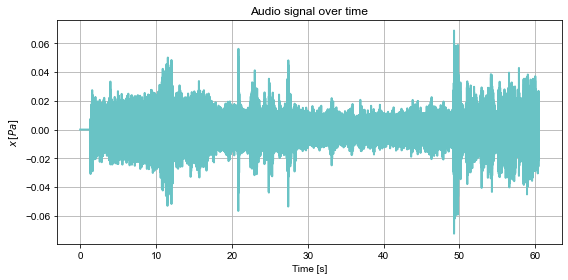

In [11]:
%%time
wp = plot_wave(wave_paths[0])
IPython.display.Audio('sound.wav')

data/wav/10.古市小学校前.mono.wav
Signal resampled to 48 kHz to allow calculation.


ValueError: rate must be specified when data is a numpy array or list of audio samples.

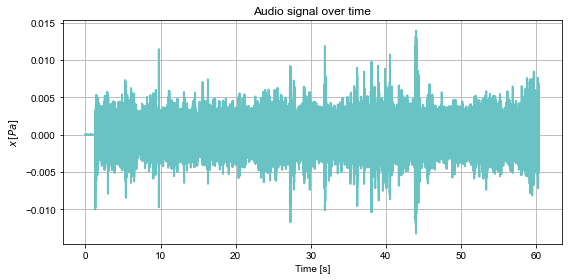

In [12]:
plot_wave(wave_paths[1])
IPython.display.Audio('sound.wav')

In [ ]:
plot_wave(wave_paths[2])
IPython.display.Audio('sound.wav')

In [ ]:
plot_wave(wave_paths[3])
IPython.display.Audio('sound.wav')

In [ ]:
plot_wave(wave_paths[4])
IPython.display.Audio('sound.wav')

In [ ]:
plot_wave(wave_paths[5])
IPython.display.Audio('sound.wav')

In [ ]:
plot_wave(wave_paths[6])
IPython.display.Audio('sound.wav')

In [ ]:
plot_wave(wave_paths[7])
IPython.display.Audio('sound.wav')

In [ ]:
plot_wave(wave_paths[8])
IPython.display.Audio('sound.wav')

In [ ]:
plot_wave(wave_paths[9])
IPython.display.Audio('sound.wav')

In [ ]:
plot_wave(wave_paths[10])
IPython.display.Audio('sound.wav')